# Optimising Purchasing Decisions Through Stock Coverage & Supplier Performance Analysis Using SQL + Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta


In [2]:
# Inventory
inventory = pd.DataFrame({
    "item_id": [1,2,3,4],
    "item_name": ["Gloves", "Masks", "Detergent", "Labels"],
    "stock_qty": [500, 200, 1500, 300],
    "safety_stock": [300, 250, 800, 200],
    "unit_cost": [2.5, 0.5, 4.0, 1.0]
})

# Consumption history
dates = pd.date_range("2025-11-01", "2025-12-31")
consumption = pd.DataFrame({
    "date": np.repeat(dates, 4),
    "item_id": np.tile([1,2,3,4], len(dates)),
    "qty_used": np.random.randint(1, 20, len(dates)*4)
})

# Suppliers
suppliers = pd.DataFrame({
    "supplier_id": [10,20,30],
    "supplier_name": ["Alpha Supply", "Beta Logistics", "Gamma Traders"],
    "lead_time_days": [7, 14, 5]
})

# Purchase Orders
purchase_orders = pd.DataFrame({
    "po_id": [1001,1002,1003,1004],
    "item_id": [1,2,3,4],
    "supplier_id": [10,20,30,10],
    "order_date": pd.to_datetime(["2025-12-01","2025-12-05","2025-12-10","2025-12-15"]),
    "promised_date": pd.to_datetime(["2025-12-08","2025-12-19","2025-12-15","2025-12-22"]),
    "received_date": pd.to_datetime(["2025-12-07","2025-12-22","2025-12-14","2025-12-23"]),
    "qty": [300,400,500,200]
})


In [3]:
# Average daily consumption
daily = consumption.groupby("item_id")["qty_used"].mean().reset_index()
daily.columns = ["item_id", "avg_daily_use"]

# Merge with inventory
stock = inventory.merge(daily, on="item_id")
stock["coverage_days"] = stock["stock_qty"] / stock["avg_daily_use"]

stock


,item_id,item_name,stock_qty,safety_stock,unit_cost,avg_daily_use,coverage_days
0,1,Gloves,500,300,2.5,10.262295,48.722045
1,2,Masks,200,250,0.5,10.311475,19.395866
2,3,Detergent,1500,800,4.0,10.114754,148.298217
3,4,Labels,300,200,1.0,9.360656,32.049037


In [4]:
stock["status"] = np.where(stock["stock_qty"] < stock["safety_stock"], "Below Safety Stock", "OK")
stock


,item_id,item_name,stock_qty,safety_stock,unit_cost,avg_daily_use,coverage_days,status
0,1,Gloves,500,300,2.5,10.262295,48.722045,OK
1,2,Masks,200,250,0.5,10.311475,19.395866,Below Safety Stock
2,3,Detergent,1500,800,4.0,10.114754,148.298217,OK
3,4,Labels,300,200,1.0,9.360656,32.049037,OK


In [5]:
purchase_orders["on_time"] = purchase_orders["received_date"] <= purchase_orders["promised_date"]

otif = purchase_orders.groupby("supplier_id")["on_time"].mean().reset_index()
otif.columns = ["supplier_id", "OTIF"]

otif = otif.merge(suppliers, on="supplier_id")
otif


,supplier_id,OTIF,supplier_name,lead_time_days
0,10,0.5,Alpha Supply,7
1,20,0.0,Beta Logistics,14
2,30,1.0,Gamma Traders,5


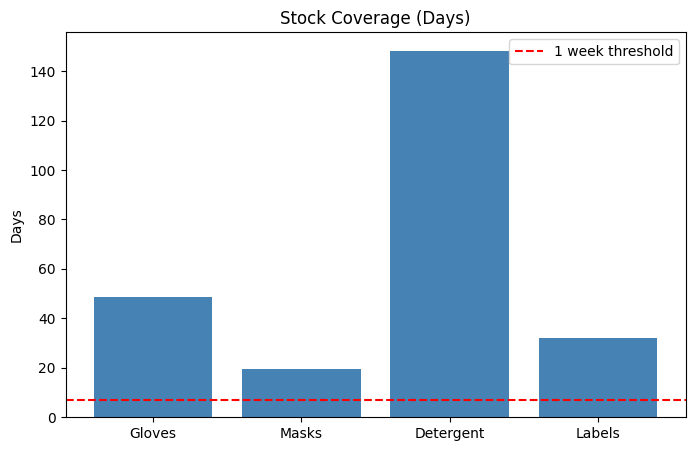

In [6]:
plt.figure(figsize=(8,5))
plt.bar(stock["item_name"], stock["coverage_days"], color="steelblue")
plt.axhline(7, color="red", linestyle="--", label="1 week threshold")
plt.title("Stock Coverage (Days)")
plt.ylabel("Days")
plt.legend()
plt.show()


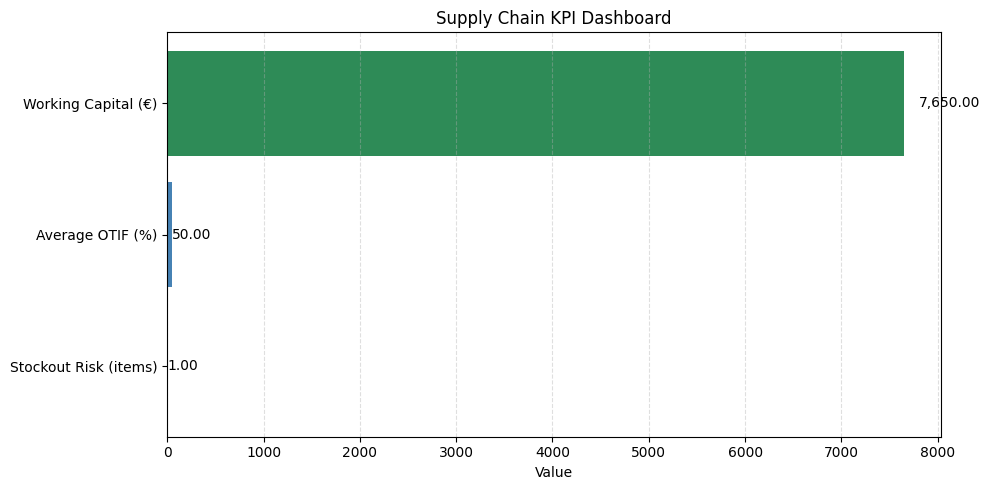

In [7]:
import matplotlib.pyplot as plt

# KPI values
stockout_risk = 1
otif_avg = 0.50   # 50%
working_capital = 7650  # €

# Prepare data
kpi_names = ["Stockout Risk (items)", "Average OTIF (%)", "Working Capital (€)"]
kpi_values = [stockout_risk, otif_avg * 100, working_capital]

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(kpi_names, kpi_values, color=["tomato", "steelblue", "seagreen"])

# Add labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + (width * 0.02), bar.get_y() + bar.get_height()/2,
             f"{width:,.2f}", va='center')

plt.title("Supply Chain KPI Dashboard")
plt.xlabel("Value")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
